In [1]:
import xarray as xr

In [2]:
file = xr.open_dataset(r"C:\Users\AndreaAngelidou\climada\data\C3S-LC-L4-LCCS-Map-300m-P1Y-2020-v2.1.1.nc")

In [3]:
file = file.sel(time='2020-01-01T00:00:00').drop("time")

C:\Users\AndreaAngelidou\AppData\Local\Temp\ipykernel_20732\2372617057.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  file = file.sel(time='2020-01-01T00:00:00').drop("time")


In [4]:
file = file.rename({"lccs_class": "value"})

In [5]:
#file = file["lccs_class"]
file = file["value"]

In [6]:
file = file.chunk(chunks={'lat': 1000, 'lon': 1000})

Classes chosen:

50: tree_broadleaved_evergreen_closed_to_open 
60: tree_broadleaved_deciduous_closed_to_open 
61: tree_broadleaved_deciduous_closed 
62: tree_broadleaved_deciduous_open 
70: tree_needleleaved_evergreen_closed_to_open 
71: tree_needleleaved_evergreen_closed 
72: tree_needleleaved_evergreen_open 
80: tree_needleleaved_deciduous_closed_to_open 
81: tree_needleleaved_deciduous_closed 
82: tree_needleleaved_deciduous_open 
90: tree_mixed 



In [7]:
forest = (50 <= file) & (file <= 90)

In [8]:
forest

<xarray.DataArray 'value' (lat: 64800, lon: 129600)>
dask.array<and_, shape=(64800, 129600), dtype=bool, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 90.0 90.0 89.99 89.99 ... -89.99 -89.99 -90.0 -90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0

In [9]:
forest = forest.rename({"lat": "latitude", "lon": "longitude"})

In [10]:
forest = forest.sel(latitude=slice(89,-89, 10), longitude=slice(-180,180, 10))

In [11]:
forest

<xarray.DataArray 'value' (latitude: 6408, longitude: 12960)>
dask.array<getitem, shape=(6408, 12960), dtype=bool, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 89.0 88.97 88.94 ... -88.92 -88.95 -88.97
  * longitude  (longitude) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0

In [12]:
from dask.diagnostics import ProgressBar

In [13]:
with ProgressBar():
    forest = forest.compute()

[########################################] | 100% Completed | 324.38 s


In [14]:
forest

<xarray.DataArray 'value' (latitude: 6408, longitude: 12960)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * latitude   (latitude) float64 89.0 88.97 88.94 ... -88.92 -88.95 -88.97
  * longitude  (longitude) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0

In [15]:
forest_2 = forest / forest

In [16]:
forest_2

<xarray.DataArray 'value' (latitude: 6408, longitude: 12960)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 89.0 88.97 88.94 ... -88.92 -88.95 -88.97
  * longitude  (longitude) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0

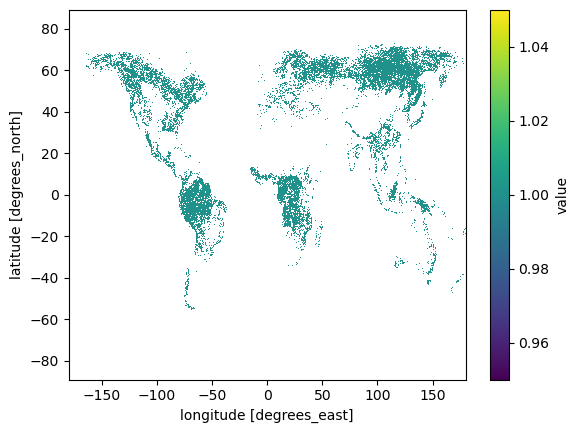

In [17]:
plot = forest_2.plot()

In [23]:
forest_2.to_dataset(name="value").to_netcdf("f_exp.nc")

In [24]:
import pandas as pd

In [25]:
df = forest_2.to_dataframe(name='value').reset_index()

In [26]:
df

,latitude,longitude,value
0,88.998611,-179.998611,NaN
1,88.998611,-179.970833,NaN
2,88.998611,-179.943056,NaN
3,88.998611,-179.915278,NaN
4,88.998611,-179.887500,NaN
...,...,...,...
83047675,-88.973611,179.862500,NaN
83047676,-88.973611,179.890278,NaN
83047677,-88.973611,179.918056,NaN
83047678,-88.973611,179.945833,NaN


In [27]:
df_2 = df.dropna()

In [28]:
df_2

,latitude,longitude,value
4763222,78.804167,11.723611,1.0
4802069,78.720833,10.806944,1.0
4892960,78.526389,15.556944,1.0
5009602,78.276389,15.612500,1.0
5048732,78.193056,22.556944,1.0
...,...,...,...
67603419,-55.890278,-67.248611,1.0
67603420,-55.890278,-67.220833,1.0
67603424,-55.890278,-67.109722,1.0
67629338,-55.945833,-67.276389,1.0


In [29]:
hdf_filename = 'forest_exp_v2.h5'
df_2.to_hdf(hdf_filename, key='data', mode='w')

In [30]:
import h5py

In [31]:
read_file = pd.read_hdf('forest_exp_v2.h5')  

In [32]:
read_file

,latitude,longitude,value
4763222,78.804167,11.723611,1.0
4802069,78.720833,10.806944,1.0
4892960,78.526389,15.556944,1.0
5009602,78.276389,15.612500,1.0
5048732,78.193056,22.556944,1.0
...,...,...,...
67603419,-55.890278,-67.248611,1.0
67603420,-55.890278,-67.220833,1.0
67603424,-55.890278,-67.109722,1.0
67629338,-55.945833,-67.276389,1.0
